# Air-Quality-Dataset-Analysis-EDA

### Python · UCI ML Air Quality Dataset

## Air-Quality-Dataset-Analysis-EDA¶

### Project Description

In this project Rodrigo Franco and Gunnar David analyse the UCI Air Quality (AQ) Dataset qualitatively and quantitativly. We will clean, wrangle and visualize the data. The goal of this study is to better understand the impact of the explanatory variables on the air pollution. The sensor data was recorded in Italy March 2004 to February 2005 (one year) [UCI AQ Dataset](https://archive.ics.uci.edu/ml/datasets/air+quality).

## In this notebook, you'll find:
- About the dataset
- Exploratory Data Analysis
- Data Visualization
- Summary of extracted patterns and relationships within the datset

## Dependencies:
- Matplotlib
- Plotly
- Seaborn
- NumPy
- Pandas

## Contents

In [2]:
##### insert TOC with nbextensions #####

## About the dataset
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an AQ Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

### Summary report:

In [1]:
#########GOOGLE DRIVE #######

# Detailed exploratory data analysis with python

# Case Study: UCI Air Quality Dataset - EDA

## Exploratory data analysis (EDA)
The purpose of this EDA is to find insights which will serve us later in another notebook for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm and deep neural nets. We will proceed as follow:

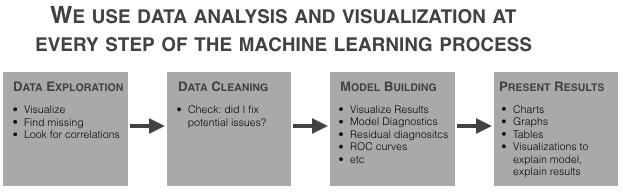

In [15]:
from  IPython.display import Image
Image("http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png")

#BREAKDOWN OF TASKS PERFORMED IN THE ANALYSIS
# Activites List
It is highly encouraged to work in a group of two students for the lab of this case study.
Important: for Activity 3 and Activity 4 , please use the file Data_Marketing_Customer_Analysis_Round3.csv from the Data folder.
## Activity 3 (Wednesday) UPDATE UPDATE UPDATE
- Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

## Loading and understanding the dataset

In [16]:
#Importing all the dependencies 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy.stats import boxcox
import missingno as msno
import plotly
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

df = pd.read_csv("/Users/Gunnar/Documents/GitHub/UCI-Air-Quality-Analysis-Prediction-/input/AirQualityUCI.csv", parse_dates={'datetime': ['Date', 'Time']})

### Attribute Information:  

**DATETIME** 

Date (DD/MM/YYYY)   
Time (HH.MM.SS)   

**POLLUTANTS VARIABLES**  

CO_GT - True hourly averaged concentration CO in mg/m^3    
PT08_S1_CO - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)    
C6H6_GT- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)    
True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)     
PT08_S2_NMHC- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)    
Nox_GT- True hourly averaged Nitric oxide concentration in ppb (reference analyzer)    
PT08_S3_Nox- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)    
NO2_GT- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)    
PT08_S4_NO2- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)    
PT08_S5_O3 - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)    

**ENVIRONMENTAL VARIABLES**  

T - Temperature in Â°C    
RH- Relative Humidity (%)    
AH - Absolute Humidity    

In [12]:
#check the head of the dataset
df.head()

,datetime,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23 19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23 20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17 18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23 18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26 18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [26]:
#check the tail of the dataset
df.tail()

,datetime,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,2005-03-23 04:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,2005-03-26 04:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,2005-03-29 04:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,2005-04-01 04:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low
9356,2005-04-04 04:00:00,-200.0,864,-200,0.8,478,52,1116,43,958,489,11.8,56.0,0.7743,Very low


In [25]:
#check the basic statistics in the dataset
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [20]:
#check the data file for NaN count and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      9357 non-null   datetime64[ns]
 1   CO_GT         9357 non-null   float64       
 2   PT08_S1_CO    9357 non-null   int64         
 3   NMHC_GT       9357 non-null   int64         
 4   C6H6_GT       9357 non-null   float64       
 5   PT08_S2_NMHC  9357 non-null   int64         
 6   Nox_GT        9357 non-null   int64         
 7   PT08_S3_Nox   9357 non-null   int64         
 8   NO2_GT        9357 non-null   int64         
 9   PT08_S4_NO2   9357 non-null   int64         
 10  PT08_S5_O3    9357 non-null   int64         
 11  T             9357 non-null   float64       
 12  RH            9357 non-null   float64       
 13  AH            9357 non-null   float64       
 14  CO_level      9357 non-null   object        
dtypes: datetime64[ns](1), float64(5), int6

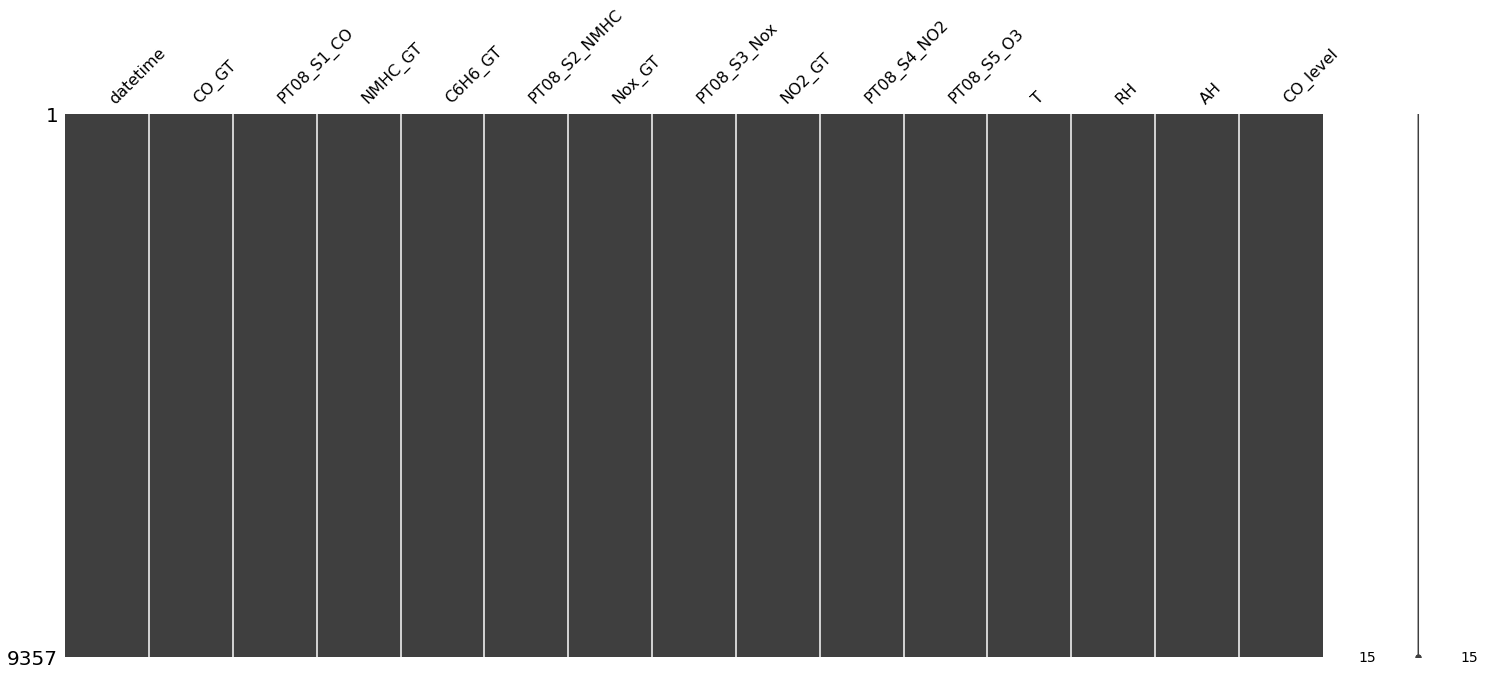

In [22]:
#This plot indicates missing values
msno.matrix(df)

In [32]:
#This data frame indicates missing values in numbers
df.isnull().sum()  

datetime        0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

**ANALYSIS TAKE-AWAY:** The file for the UCI AQ dataset first party data has no missing values.

In [29]:
#Check the shape of the dataset
df.shape

(9357, 15)

In [30]:
#Check the column headers
df.columns

Index(['datetime', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT', 'PT08_S2_NMHC',
       'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T',
       'RH', 'AH', 'CO_level'],
      dtype='object')